In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/drive/MyDrive/DBSCAN_Data.csv')

In [3]:
print(len(df))

500


In [4]:
df.head()

,Weight,Height
0,67.062924,176.086355
1,68.804094,178.388669
2,60.930863,170.284496
3,59.733843,168.691992
4,65.431230,173.763679


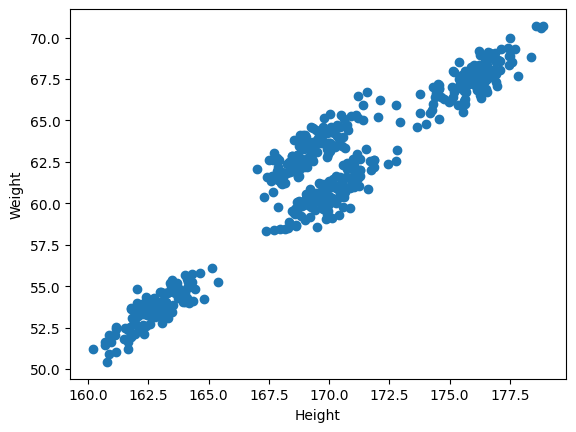

In [8]:
x = df['Height']
y = df['Weight']
plt.scatter(x,y)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [9]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.core = False
        self.index = 0
        self.id = False
        self.Neighbours = list()

In [10]:
def distance (p1,p2):
  return np.sqrt((p1.x-p2.x)**2+(p1.y-p2.y)**2)

In [11]:
points=[]
for i in range(len(df)):
    points.append(Point(df['Height'][i], df['Weight'][i]))
    points[i].index = i

In [12]:
points

In [13]:
e = 0.6
m = 4

corePoints = []
for P1 in points:
    minPointCount = 0
    for P2 in points:
        if distance(P1, P2) <= e:
            minPointCount += 1
            P1.Neighbours.append(P2)
    if minPointCount >= m:
        corePoints.append(P1)
        P1.core = True


In [14]:
def assign_cluster(point, id):
    point.id = id
    for neighbour in point.Neighbours:
        if neighbour.id == 0:
            assign_cluster(neighbour, id)
        elif not neighbour.core and neighbour.id == 0:
            neighbour.id = id


In [15]:

cluster_number = 1
for point in corePoints:
    if point.id == 0:  # Only assign a new cluster if the point has no cluster
        assign_cluster(point, cluster_number)
        cluster_number += 1

In [18]:
import random

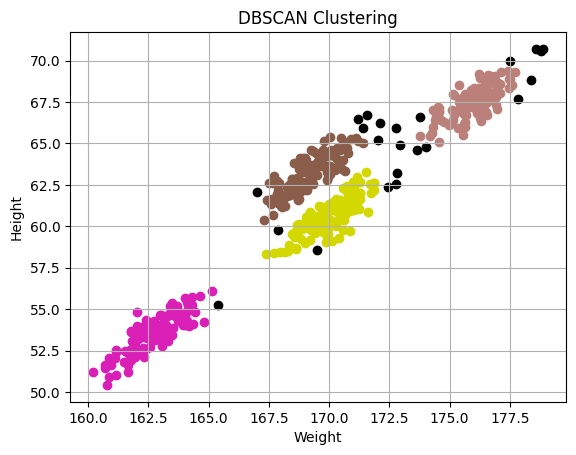

In [22]:
hexadecimal_alphabets = '0123456789ABCDEF'
for point in points:
    plt.scatter(point.x, point.y, color = color[point.id])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("DBSCAN Clustering")
plt.grid(True)
plt.show()
color = ["#" + ''.join([random.choice(hexadecimal_alphabets) for j in range(6)]) for i in range(cluster_number)]
color[0] = "black"